<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Keras/Module_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras import models
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np

import cv2

In [10]:
img_path = '/content/drive/MyDrive/Data Science/Digits-CNN/train/29d8c396-9ab.png'

img = image.load_img(img_path, target_size=(150, 150))
# img = image.load_img(img_path, target_size=(28, 28))

img_tensor = image.img_to_array(img)
# img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor = cv2.cvtColor(img_tensor, cv2.COLOR_BGR2GRAY)
img_tensor = cv2.resize(img_tensor, (28, 28), interpolation = cv2.INTER_AREA)
img_tensor = np.expand_dims(img_tensor, axis=2)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255
print(img_tensor.shape)
# print(img)

(1, 28, 28, 1)


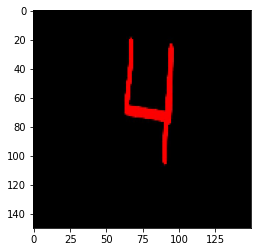

In [11]:
plt.imshow(img)
plt.show()

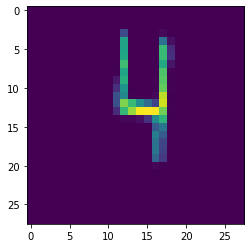

In [12]:
plt.imshow(img_tensor[0])
plt.show()

In [13]:
model = models.load_model("/content/drive/MyDrive/Data Science/Digits-CNN/CNN_model.h5")

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [15]:
layer_outputs = [layer.output for layer in model.layers[:4]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [16]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

1/1 [==============================] - 7s 7s/step


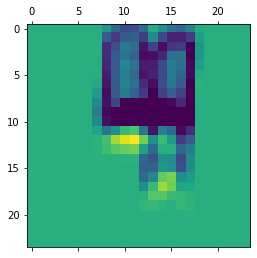

In [17]:
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')


<ipython-input-23-085821741153>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(first_layer_activation[0,:,:,i], cmap='viridis')


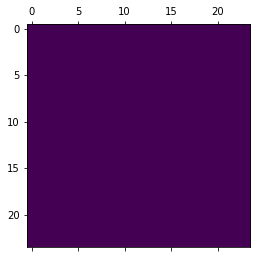

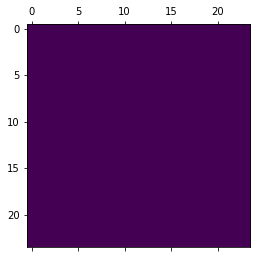

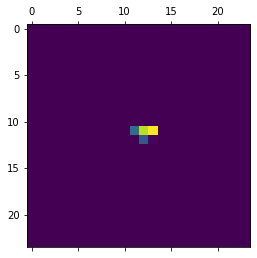

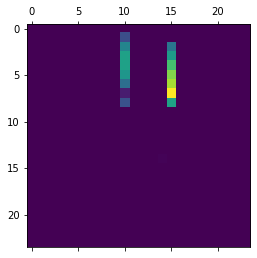

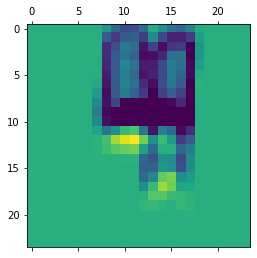

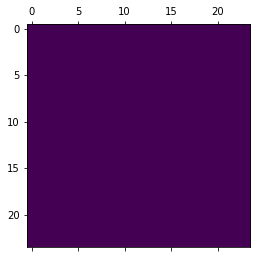

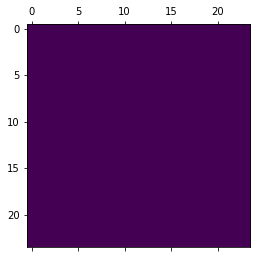

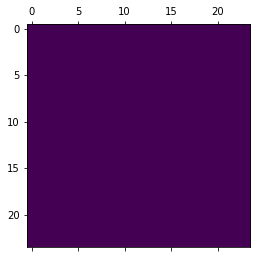

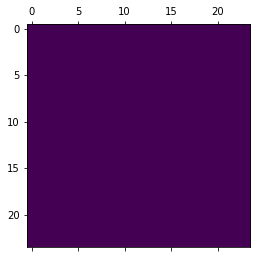

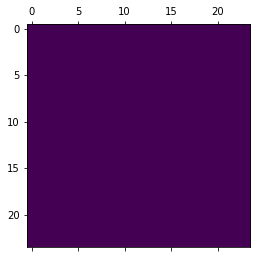

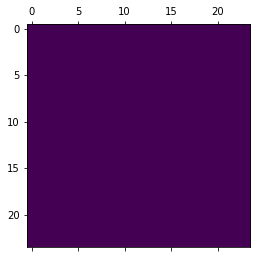

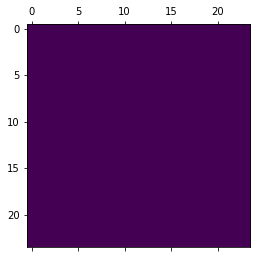

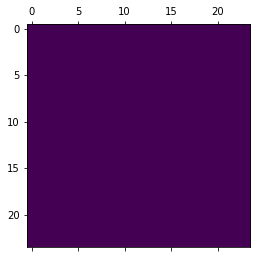

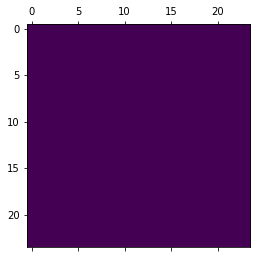

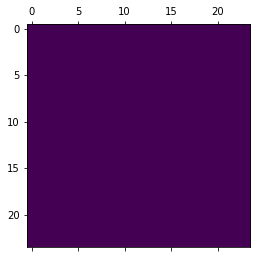

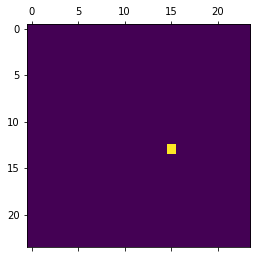

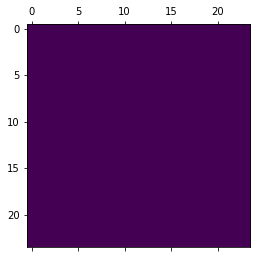

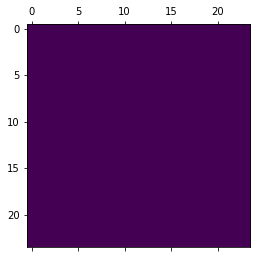

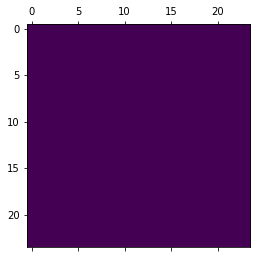

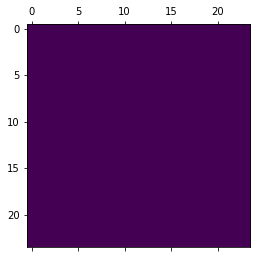

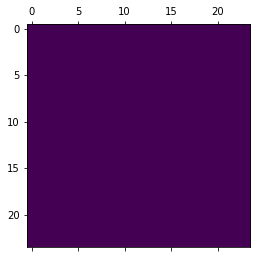

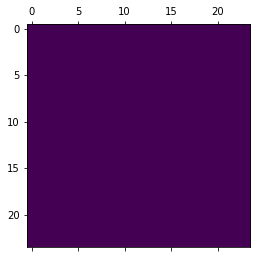

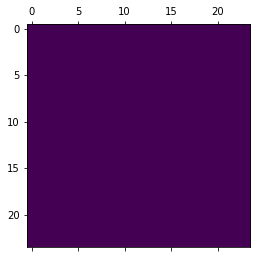

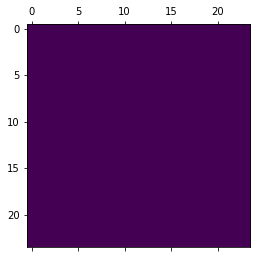

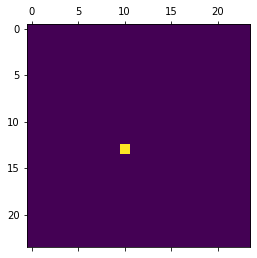

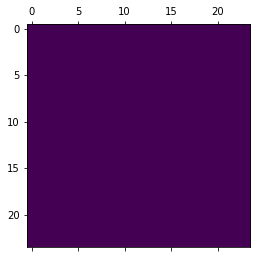

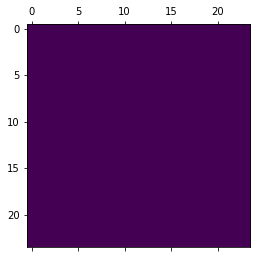

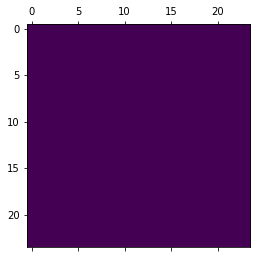

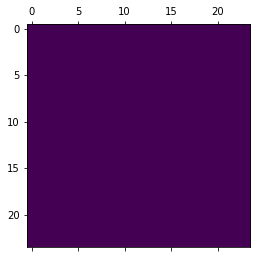

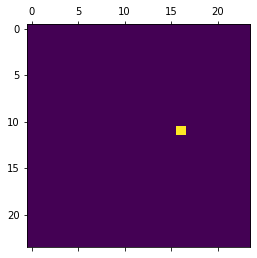

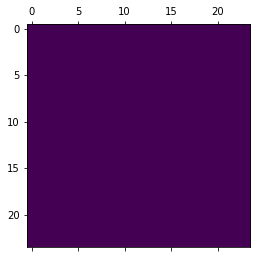

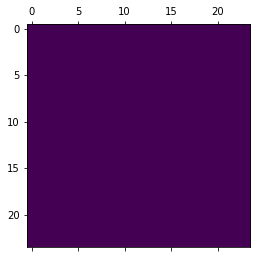

In [23]:
for i in range(32):
    plt.matshow(first_layer_activation[0,:,:,i], cmap='viridis')

1/1 [==============================] - 0s 27ms/step


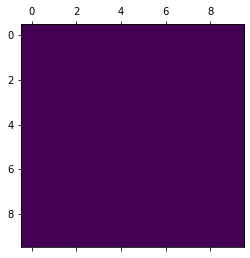

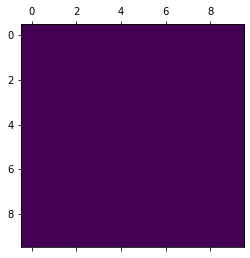

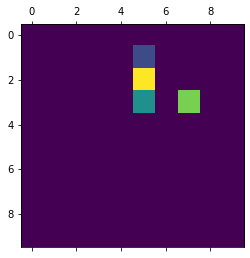

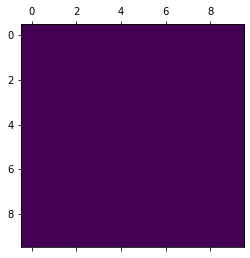

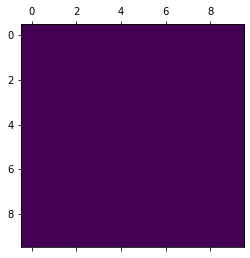

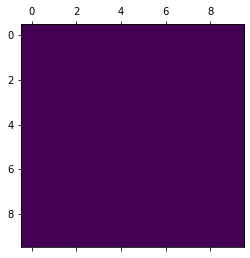

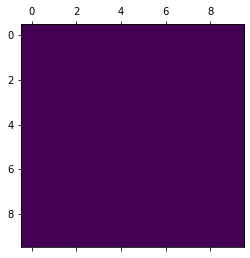

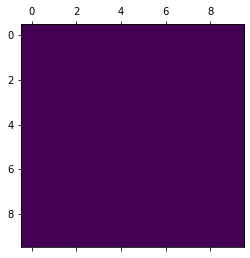

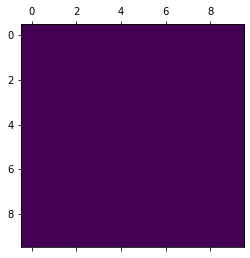

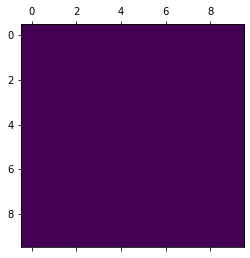

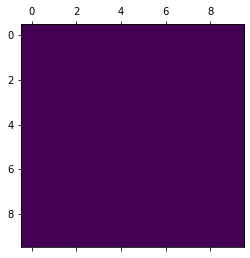

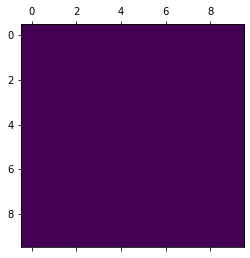

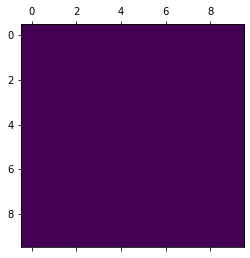

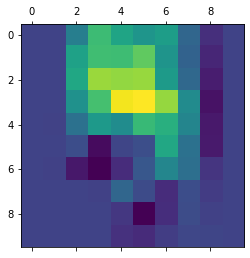

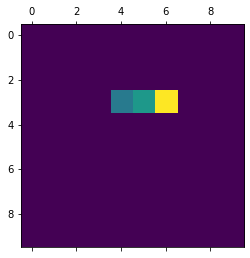

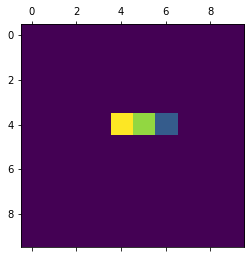

In [25]:
activations = activation_model.predict(img_tensor)
third_layer_activation = activations[2]

for i in range(16):
    plt.matshow(third_layer_activation[0,:,:,i], cmap='viridis')

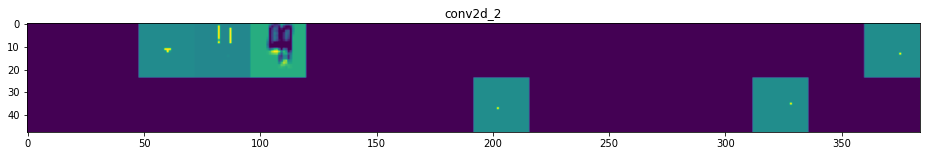

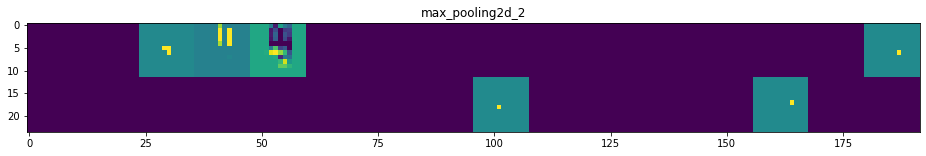

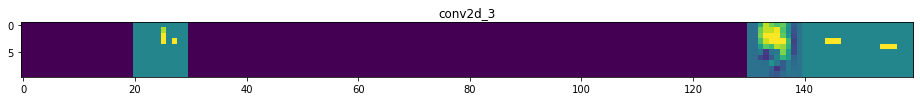

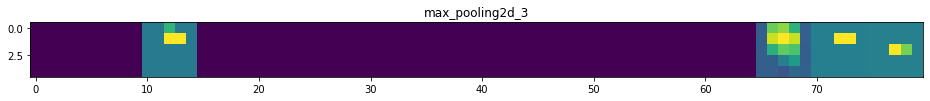

In [31]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

image_per_raw = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features =  layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // image_per_raw
    display_grid = np.zeros((size * n_cols, image_per_raw * size))

    for col in range(n_cols):
        for row in range(image_per_raw):
            channel_image = layer_activation[0,:,:, col * image_per_raw + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image +=128

            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size]  = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')